In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Outline 

1.) ***Exploration of Data***: Created visualizations of the motile/non-motile data's particle paths to better understand what features to add to our datasets + looked into if the classes are imbalanced or not; looked at correlation plots of input vs. output variables (to decide which features to remove)

2.) ***Feature Engineering***: Added 'max_step_speed','min_step_speed','mean_step_disp', 'stddev_step_disp',
'max_step_disp', 'min_step_disp', 'mean_angle', 'std_angle','max_angle', 'min_angle', 'mean_step_accel', and'stddev_step_accel' features to dataset

3.) ***Data Preprocessing***: Removed missing values, input features with high correlation values with one another, and features with low importance (based on feature importance plots)

4.) **Training/Testing Random Forest Model**: Utilized cross-validation on lab data with RandomizedSearchCV to identify optimal hyperparameters; Optimized for F score and precision/recall score


##**Data Exploration/ Feature Engineering**

## Link to particle path plots/code + feature engineering code: 

https://colab.research.google.com/drive/13sjvnPtuXK5CGZhQaWxrhXAblvSYXqGN?usp=sharing

In [ ]:
train_data = pd.read_csv('train_features_v4.csv')
test_data = pd.read_csv('test_features_v4.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16013 entries, 0 to 16012
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                16013 non-null  object 
 1   label              16013 non-null  int64  
 2   mean_step_speed    16013 non-null  float64
 3   stddev_step_speed  16013 non-null  float64
 4   track_length       16013 non-null  float64
 5   e2e_distance       16013 non-null  float64
 6   duration           16013 non-null  float64
 7   max_step_speed     16013 non-null  float64
 8   min_step_speed     16013 non-null  float64
 9   mean_step_disp     16013 non-null  float64
 10  stddev_step_disp   16013 non-null  float64
 11  max_step_disp      16013 non-null  float64
 12  min_step_disp      16013 non-null  float64
 13  mean_angle         16013 non-null  float64
 14  std_angle          16013 non-null  float64
 15  max_angle          16013 non-null  float64
 16  min_angle          160

In [ ]:
train_data.describe()

,label,mean_step_speed,stddev_step_speed,track_length,e2e_distance,duration,max_step_speed,min_step_speed,mean_step_disp,stddev_step_disp,max_step_disp,min_step_disp,mean_angle,std_angle,max_angle,min_angle,mean_step_accel,stddev_step_accel
count,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000,16013.000000
mean,0.491476,0.118591,0.019822,0.270172,0.240089,0.556473,0.009886,0.011019,0.118591,0.019822,0.009886,0.011019,0.714552,0.401988,0.874418,0.355158,0.081386,0.011030
std,0.499943,0.049365,0.013993,0.176458,0.143132,0.302860,0.011874,0.038363,0.049365,0.013993,0.011874,0.038363,0.107216,0.176045,0.069871,0.251597,0.021764,0.010759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.081339,0.011514,0.122230,0.118832,0.277778,0.005743,0.000000,0.081339,0.011514,0.005743,0.000000,0.630567,0.254906,0.845127,0.086625,0.070520,0.009914
50%,0.000000,0.086859,0.012953,0.272032,0.243623,0.605263,0.005743,0.000000,0.086859,0.012953,0.005743,0.000000,0.783044,0.282456,0.845127,0.584359,0.079272,0.010614
75%,1.000000,0.151685,0.028687,0.369501,0.353401,0.877193,0.014358,0.000000,0.151685,0.028687,0.014358,0.000000,0.801080,0.572234,0.935840,0.584359,0.093393,0.011818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data.head(15)

,uid,label,mean_step_speed,stddev_step_speed,track_length,e2e_distance,duration,max_step_speed,min_step_speed,mean_step_disp,stddev_step_disp,max_step_disp,min_step_disp,mean_angle,std_angle,max_angle,min_angle,mean_step_accel,stddev_step_accel
0,lab_0_0,0,0.009109,0.002025,0.033693,0.033940,0.877193,0.001171,0.002158,0.009109,0.002025,0.001171,0.002158,0.652603,0.543520,0.936945,0.049285,0.001408,0.001103
1,lab_0_1,0,0.008686,0.001743,0.032128,0.027681,0.877193,0.000729,0.001326,0.008686,0.001743,0.000729,0.001326,0.617530,0.620026,0.922441,0.080110,0.001302,0.000934
2,lab_0_2,0,0.008809,0.002006,0.032584,0.026583,0.877193,0.000966,0.002437,0.008809,0.002006,0.000966,0.002437,0.633221,0.525604,0.936945,0.047725,0.001316,0.000985
3,lab_0_3,0,0.011363,0.002220,0.042033,0.035717,0.877193,0.000925,0.004687,0.011363,0.002220,0.000925,0.004687,0.568889,0.616677,0.935840,0.021426,0.001626,0.001306
4,lab_0_4,0,0.005146,0.001961,0.019035,0.001358,0.877193,0.000797,0.001383,0.005146,0.001961,0.000797,0.001383,0.710587,0.564535,0.967315,0.085560,0.000713,0.000830
5,lab_0_5,1,0.171764,0.015002,0.247789,0.285407,0.342105,0.008834,0.063343,0.171764,0.015002,0.008834,0.063343,0.498754,0.862750,0.948834,0.168717,0.007308,0.005320
6,lab_0_6,1,0.102645,0.016611,0.198702,0.124064,0.459064,0.006672,0.035983,0.102645,0.016611,0.006672,0.035983,0.629850,0.523342,0.925079,0.224738,0.010210,0.005544
7,lab_1_0,1,0.243196,0.052401,0.899583,0.807726,0.877193,0.026474,0.054303,0.243196,0.052401,0.026474,0.054303,0.474879,0.797129,0.972238,0.011693,0.125023,0.036242
8,lab_1_1,0,0.006593,0.000140,0.024388,0.030654,0.877193,0.000271,0.007313,0.006593,0.000140,0.000271,0.007313,0.477172,0.198884,0.579363,0.439410,0.000079,0.000086
9,lab_1_2,0,0.005884,0.001131,0.001451,0.001878,0.058480,0.000284,0.000000,0.005884,0.001131,0.000284,0.000000,0.454465,0.402672,0.735506,0.409098,0.000508,0.000443


In [ ]:
train_data['label'].value_counts()

0    8143
1    7870
Name: label, dtype: int64

In [ ]:
train_data.columns.values

array(['uid', 'label', 'mean_step_speed', 'stddev_step_speed',
       'track_length', 'e2e_distance', 'duration', 'max_step_speed',
       'min_step_speed', 'mean_step_disp', 'stddev_step_disp',
       'max_step_disp', 'min_step_disp', 'mean_angle', 'std_angle',
       'max_angle', 'min_angle', 'mean_step_accel', 'stddev_step_accel'],
      dtype=object)

In [ ]:
corr_df=train_data.corr()
cor= corr_df.corr(method='pearson')
print(cor)

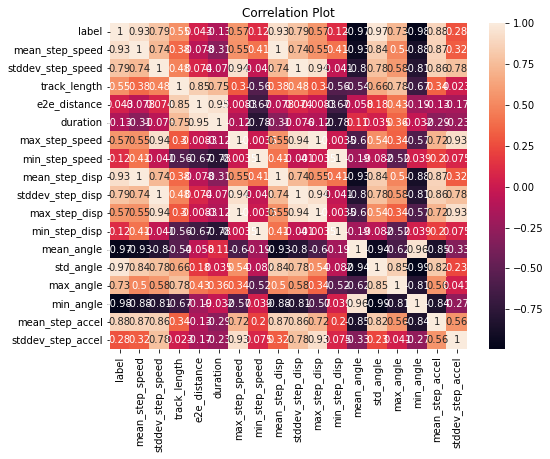

In [ ]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, annot = True)
plt.show()

## **Testing/Training on New Features**

##K-Fold Cross Validation:
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

cross-v.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [ ]:
X_train = train_data.drop('label', axis = 1)
X_train = X_train.drop('uid', axis = 1)
X_train = X_train.dropna()

In [ ]:
train_data.dropna()
Y_train = train_data.label

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.87827715 0.99875156 0.99812734 0.99937539 0.99812617 0.99750156
 0.99875078 0.99812617 0.99750156 0.99812617]
Mean: 0.9862663862551571
Standard Deviation: 0.0360005057099601


This looks much more realistic than before. Our model has a average accuracy of 98.6% with a standard deviation of 3.6 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + - 3.6%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it's performance even further in the following section.

##Feature Importance
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will access this below:

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances

,importance
feature,
max_step_speed,0.185
mean_step_speed,0.180
max_step_disp,0.167
mean_step_disp,0.134
stddev_step_disp,0.088
min_angle,0.076
stddev_step_speed,0.068
std_angle,0.034
mean_step_accel,0.018


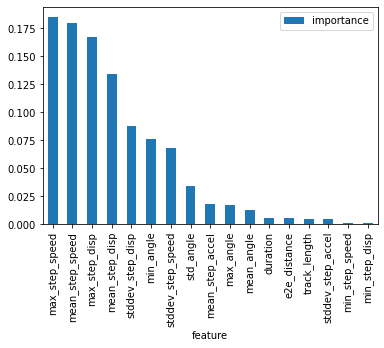

In [ ]:
importances.plot.bar()

**Conclusion:**

'min_step_speed' and 'stddev_step_accel' do not play a significant role in our random forest classifiers prediction process. Because of that we will drop them from the dataset and train the classifier again.
Looking at the correlation plots from above, we choose to remove 'mean_step_disp', 'max_step_disp', 'min_step_disp', and 'stddev_step_disp', as they heavily correlate with their respective speed x-variables.

## **Data Preprocessing with New Features**

In [ ]:
train_data_new = train_data.drop('mean_step_disp', axis = 1)
train_data_new = train_data_new.drop('max_step_disp', axis = 1)
train_data_new = train_data_new.drop('min_step_disp', axis = 1)
train_data_new = train_data_new.drop('stddev_step_disp', axis = 1)

train_data_new = train_data_new.drop('stddev_step_accel', axis = 1)
train_data_new = train_data_new.drop('min_step_speed', axis = 1)

In [ ]:
(train_data_new.columns.values)


array(['uid', 'label', 'mean_step_speed', 'stddev_step_speed',
       'track_length', 'e2e_distance', 'duration', 'max_step_speed',
       'mean_angle', 'std_angle', 'max_angle', 'min_angle',
       'mean_step_accel'], dtype=object)

In [ ]:
corr_df=train_data_new.corr()
cor= corr_df.corr(method='pearson')
print(cor)

                      label  mean_step_speed  stddev_step_speed  track_length  \
label              1.000000         0.963304           0.878055      0.572848   
mean_step_speed    0.963304         1.000000           0.893707      0.517413   
stddev_step_speed  0.878055         0.893707           1.000000      0.505935   
track_length       0.572848         0.517413           0.505935      1.000000   
e2e_distance      -0.002894        -0.012260           0.005132      0.804370   
duration          -0.176255        -0.237563          -0.180406      0.699074   
max_step_speed     0.690149         0.738058           0.950058      0.362665   
mean_angle        -0.975952        -0.945843          -0.881510     -0.624107   
std_angle          0.984183         0.915764           0.847004      0.644755   
max_angle          0.821223         0.707470           0.655634      0.685172   
min_angle         -0.989598        -0.937106          -0.871520     -0.671034   
mean_step_accel    0.895300 

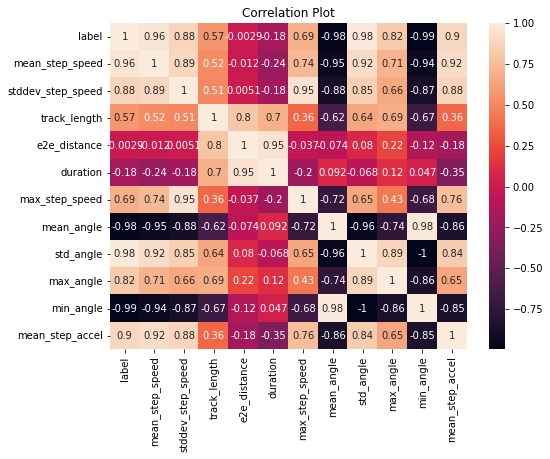

In [ ]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, annot = True)
plt.show()

In [ ]:
col_newest = ['mean_step_speed', 'stddev_step_speed',
       'track_length', 'e2e_distance', 'duration', 'max_step_speed',
       'mean_angle', 'std_angle', 'max_angle', 'min_angle',
       'mean_step_accel']

In [ ]:
train_data = train_data.dropna()
X_train = train_data[col_newest] # Features
Y_train = train_data.label # Target variable


X_test = test_data[col_newest] # Features
Y_test = test_data.label # Target variable

Training random forest once again:

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.94 %


##Hyperparameter Tuning
Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split, n_estimators, max_features, max_depth, and bootstrap.

We use RandomSearchCV to choose only a few ‘random’ combinations out of all the available combinations of parameters to test. 

In the below code, the RandomizedSearchCV function will try any 150 (given by parameter 'n_iter) combinations of hyperparameters.

We have specified cv=10. This means the model will be tested(cross-validated) 10 times. By dividing the data into 10 parts, choosing one part as testing and the other 9 as training data. The final accuracy for each combination of hyperparameter is the average of these 10 iterations.


n_jobs = -1 specifies the number of parallel threads to run and verbose = 2 means how much detail to print out while fitting the model, the higher the value, the more the details printed.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10, 12, 16, 4, 5]
min_samples_leaf = [1, 3, 4, 5, 8, 10]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

In [ ]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap, 
'criterion':['gini', 'entropy']}



In [ ]:
rf_random = RandomizedSearchCV(estimator = random_forest,

param_distributions = random_grid,
               n_iter = 150, cv = 10, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train,Y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4, 5, 8, 10],
                                        'min_samples_split': [2, 6, 10, 12, 16,
                                                              4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19

In [ ]:
# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10, 12, 16, 4, 5], 'min_samples_leaf': [1, 3, 4, 5, 8, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']} 

Best Parameters:  {'n_estimators': 3, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}  



In [ ]:
rfc_new = RandomForestClassifier(n_estimators=3, min_samples_split=6, min_samples_leaf=10, max_features= 'auto',max_depth=30, criterion='entropy', bootstrap=True)


In [ ]:
rfc_new.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=10,
                       min_samples_split=6, n_estimators=3)

In [ ]:
pred=rfc_new.predict(X_test)

In [ ]:
rfc_new.score(X_train, Y_train)
acc_r_f = round(rfc_new.score(X_train, Y_train) * 100, 2)
print(round(acc_r_f,2,), "%")

99.66 %


## Evaluation of Model Performance: Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rfc_new, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[8022,  121],
       [  31, 7839]])

The first row is about the not-motile-predictions: 8022 samples were correctly classified as not motile (called true negatives) and 121 where wrongly classified as not motile (false negatives).

The second row is about the motile-predictions: 31 samples where wrongly classified as motile(false positives) and 7839 where correctly classified as motil (true positives).

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.9847989949748743
Recall: 0.9960609911054638


Our model predicts 98% of the time a sample being motile correctly (precision). The recall tells us that it predicted samples being motile 99.6 % of the actually motile samples.

##F-Score
You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.9903979785217941

In [ ]:
print(pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1]


In [ ]:
print(len(pred))

477


In [ ]:
new_csv_columns = ["uid", "label"] 

In [ ]:
label_new_csv = np.asarray(pred)

In [ ]:
uid_new_csv = np.asarray(test_data.uid)

In [ ]:
dictionary_new_csv = {
    'uid':uid_new_csv,
    'label': label_new_csv
}

In [ ]:
df = pd.DataFrame(dictionary_new_csv)

In [ ]:
df.to_csv("submission_.csv",index=False, columns=new_csv_columns)

Best CSV File Submission: 

https://drive.google.com/file/d/1ZOi9tTahqN8fupOnZ-GkwvdZadskehXt/view?usp=share_link